In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.3MB/s 
     |████████████████████████████████| 6.5MB 28.8MB/s 
     |████████████████████████████████| 15.3MB 308kB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, MeanShift, Birch, AgglomerativeClustering

import descartes
import geopandas as gpd
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
prec_data = pd.read_csv("precipitation_centers.csv")
prec_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,111,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,347,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,162,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,105,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133


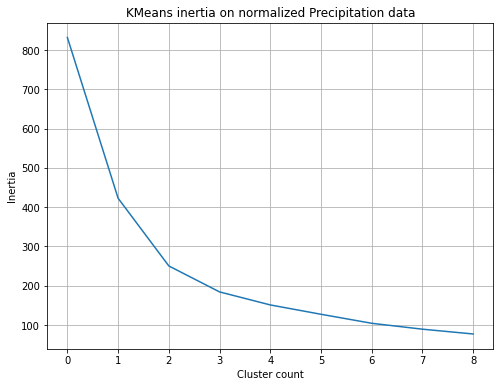

In [ ]:
inertia = []

for cluster_count in range(1, 10):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data.iloc[:, 7:-1]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (8, 6))
plt.plot(inertia, label = 'Precipitation level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data")
plt.grid(True)


In [ ]:
map_data = prec_data.copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:-1]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation,Cluster
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143,2
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133,1
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133,0
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133,1
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133,1


In [ ]:
world = gpd.read_file("cb_2018_us_county_500k.shp")
arkansas = world[world['STATEFP']=='05']
florida = world[world['STATEFP']=='12']

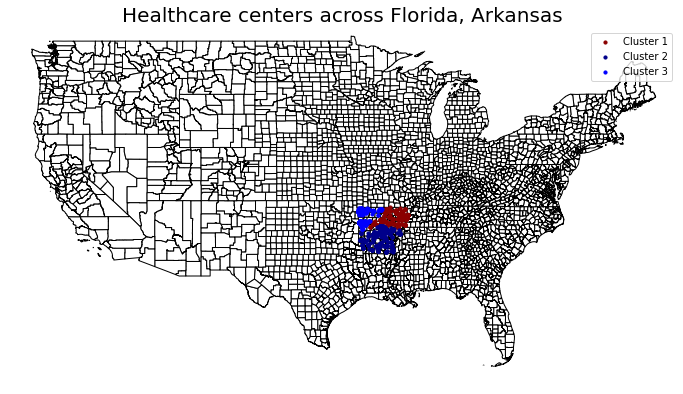

In [ ]:
ax = world.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers= map_data
points = [Point(xy) for xy in zip(centers["LONGITUDE"], centers["LATITUDE"])]
centers = gpd.GeoDataFrame(centers, crs = {'init': 'epsg:4326'}, geometry = points)

centers[centers["Cluster"] == 0].plot(color = 'darkred', ax = ax, markersize = 10, label = "Cluster 1")
centers[centers["Cluster"] == 1].plot(color = 'darkblue', ax = ax, markersize = 10, label = "Cluster 2")
centers[centers["Cluster"] == 2].plot(color = 'blue', ax = ax, markersize = 10, label = "Cluster 3")


plt.title("Healthcare centers across Florida, Arkansas", fontsize = 20)
ax.set_xlim(-127, -65)
ax.set_ylim(23, 50)
ax.axis('off')
plt.legend()




In [ ]:
centers

In [ ]:
print(centers[centers['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers[centers['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())



176.15632106828375
162.30168420829438
159.88086431769545


In [ ]:
prec_data[prec_data['STATE']=='AR']

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
7,372903,MERCY HOSPITAL FORT SMITH,7301 ROGERS AVENUE,AR,35.355866,-94.352055,HOSPITAL,127,106,101,101,241,158,154,41,294,63,95,73,23,140,57,422,360,38,43,137,102,122,277,137,146,111,261,125,55,77,120,109,122,...,138,27,103,89,344,153,147,144,133,131,217,181,204,86,228,150,192,117,234,291,277,130,294,128,325,180,45,249,133,241,259,383,80,169,280,246,201,91,173,206
8,7472901,HEALTHSOUTH REHABILITATION HOSPITAL OF FORT SMITH,1401 SOUTH J STREET,AR,35.373940,-94.418754,HOSPITAL,124,103,99,99,238,160,152,40,300,65,93,74,22,135,55,415,362,37,39,132,102,121,268,130,147,110,260,129,57,78,122,110,117,...,144,26,99,85,340,154,140,148,136,128,211,181,201,83,225,149,186,122,227,286,273,131,289,130,343,175,45,245,131,252,243,380,70,175,280,251,205,90,178,206
9,9700000,WHITE COUNTY MEDICAL CENTER - SOUTH CAMPUS,1200 SOUTH MAIN STREET,AR,35.234094,-91.731074,HOSPITAL,150,143,121,126,282,62,172,64,94,27,182,67,58,215,142,368,301,65,65,162,79,94,390,249,126,152,214,55,43,72,60,177,137,...,74,45,222,87,562,161,196,136,79,118,221,168,196,124,254,156,371,120,284,292,160,122,195,70,193,214,63,223,257,342,342,223,128,126,202,119,121,88,161,121
10,10172143,WHITE COUNTY MEDICAL CENTER - NORTH CAMPUS,3214 EAST RACE AVENUE,AR,35.251886,-91.697001,HOSPITAL,149,140,121,125,284,59,173,62,89,26,188,67,59,214,145,364,309,64,67,158,76,94,388,252,131,154,210,52,47,73,59,176,137,...,67,45,228,90,559,164,203,127,79,106,228,171,188,127,250,158,379,124,286,286,160,122,195,70,193,214,64,223,260,349,337,215,140,116,198,118,129,102,162,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10896,CYF Pharmacy,1521 Merrill Dr Ste D220,AR,34.768759,-92.399467,PHARMACY,141,172,104,118,235,88,133,84,75,43,187,65,56,192,117,402,310,65,69,164,71,92,411,261,131,172,236,94,39,70,67,191,197,...,64,31,243,82,540,156,242,112,89,119,196,215,252,148,296,159,309,131,318,303,176,142,165,63,233,200,69,242,263,247,311,226,218,118,158,158,125,61,222,78
2201,10897,Live+Well Pharmacy,767 W North St,AR,36.077137,-94.170548,PHARMACY,108,81,125,95,257,149,180,37,320,47,106,45,20,148,86,465,342,46,43,135,127,94,277,113,95,89,221,117,59,72,69,121,130,...,145,37,83,78,319,173,111,174,96,150,194,127,149,89,182,155,153,122,205,295,289,126,240,145,315,184,44,235,118,262,252,339,90,192,190,166,256,95,133,147
2202,10898,SMITH DRUG AND COMPOUNDING INC.,1 Mercy Ln Ste 103,AR,34.467638,-93.068013,PHARMACY,140,193,98,109,248,141,140,70,66,52,159,75,68,176,82,394,328,70,113,123,73,94,373,240,145,164,237,119,31,71,85,169,215,...,67,34,227,84,512,138,241,104,102,125,192,217,278,155,282,171,272,135,300,313,200,158,124,53,248,177,56,209,227,265,283,265,247,142,263,183,99,57,185,165
2203,10899,Roland Drug Store #2,600 Highway 365,AR,34.962865,-92.4235

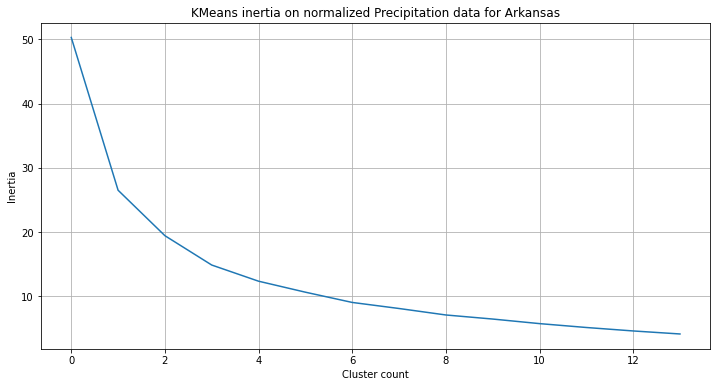

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "AR"].iloc[:, 7:-1]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Arkansas")
plt.grid(True)



In [ ]:
prec_data[prec_data['STATE']=='AR'].head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,149,47,74,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143
7,372903,MERCY HOSPITAL FORT SMITH,7301 ROGERS AVENUE,AR,35.355866,-94.352055,HOSPITAL,127,106,101,101,241,158,154,41,294,63,95,73,23,140,57,422,360,38,43,137,102,122,277,137,146,111,261,125,55,77,120,109,122,...,138,27,103,89,344,153,147,144,133,131,217,181,204,86,228,150,192,117,234,291,277,130,294,128,325,180,45,249,133,241,259,383,80,169,280,246,201,91,173,206
8,7472901,HEALTHSOUTH REHABILITATION HOSPITAL OF FORT SMITH,1401 SOUTH J STREET,AR,35.373940,-94.418754,HOSPITAL,124,103,99,99,238,160,152,40,300,65,93,74,22,135,55,415,362,37,39,132,102,121,268,130,147,110,260,129,57,78,122,110,117,...,144,26,99,85,340,154,140,148,136,128,211,181,201,83,225,149,186,122,227,286,273,131,289,130,343,175,45,245,131,252,243,380,70,175,280,251,205,90,178,206
9,9700000,WHITE COUNTY MEDICAL CENTER - SOUTH CAMPUS,1200 SOUTH MAIN STREET,AR,35.234094,-91.731074,HOSPITAL,150,143,121,126,282,62,172,64,94,27,182,67,58,215,142,368,301,65,65,162,79,94,390,249,126,152,214,55,43,72,60,177,137,...,74,45,222,87,562,161,196,136,79,118,221,168,196,124,254,156,371,120,284,292,160,122,195,70,193,214,63,223,257,342,342,223,128,126,202,119,121,88,161,121
10,10172143,WHITE COUNTY MEDICAL CENTER - NORTH CAMPUS,3214 EAST RACE AVENUE,AR,35.251886,-91.697001,HOSPITAL,149,140,121,125,284,59,173,62,89,26,188,67,59,214,145,364,309,64,67,158,76,94,388,252,131,154,210,52,47,73,59,176,137,...,67,45,228,90,559,164,203,127,79,106,228,171,188,127,250,158,379,124,286,286,160,122,195,70,193,214,64,223,260,349,337,215,140,116,198,118,129,102,162,121


No handles with labels found to put in legend.


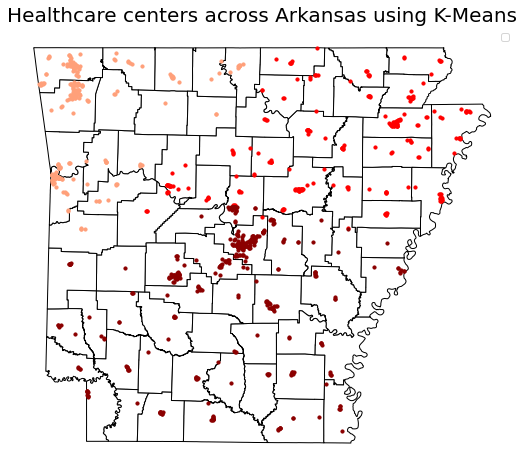

In [ ]:
map_data = prec_data[prec_data["STATE"] == "AR"].copy()

kmeans = KMeans(3, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:-1]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = arkansas.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_ar = map_data
points = [Point(xy) for xy in zip(centers_ar["LONGITUDE"], centers_ar["LATITUDE"])]
centers_ar = gpd.GeoDataFrame(centers_ar, crs = {'init': 'epsg:4326'}, geometry = points)

centers_ar[centers_ar["Cluster"] == 0].plot(color = 'red', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 1].plot(color = 'darkred', ax = ax, markersize = 10)
centers_ar[centers_ar["Cluster"] == 2].plot(color = 'lightsalmon', ax = ax, markersize = 10)


plt.title("Healthcare centers across Arkansas using K-Means" , fontsize = 20)

ax.axis('off')
plt.legend()


In [ ]:
print(centers_ar[centers_ar['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_ar[centers_ar['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())

159.57231146046928
164.3231069560859
152.5461966604824


In [ ]:
cl_0 = list(centers_ar.index[centers_ar['Cluster']==0])
cl_1 = list(centers_ar.index[centers_ar['Cluster']==1])
cl_2 = list(centers_ar.index[centers_ar['Cluster']==2])

centers_ar.loc[cl_0, 'Color']='lightsalmon'
centers_ar.loc[cl_1, 'Color']='red'
centers_ar.loc[cl_2, 'Color']='darkred'

centers_ar.to_csv("centers_ar.csv", index = False)

In [ ]:
centers_ar.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation,Cluster,geometry,Color
0,63072758,MERCY HOSPITAL ROGERS,2710 RIFE MEDICAL LANE,AR,36.308993,-94.182978,HOSPITAL,98,69,137,92,261,147,177,34,326,42,112,33,20,146,99,465,314,51,40,115,153,79,265,100,69,78,198,117,65,67,44,125,133,...,70,289,171,101,175,93,160,186,109,119,91,170,157,127,119,189,305,283,118,235,163,310,181,45,281,107,270,233,305,98,192,147,136,264,94,117,143,0,POINT (-94.18298 36.30899),lightsalmon
7,372903,MERCY HOSPITAL FORT SMITH,7301 ROGERS AVENUE,AR,35.355866,-94.352055,HOSPITAL,127,106,101,101,241,158,154,41,294,63,95,73,23,140,57,422,360,38,43,137,102,122,277,137,146,111,261,125,55,77,120,109,122,...,89,344,153,147,144,133,131,217,181,204,86,228,150,192,117,234,291,277,130,294,128,325,180,45,249,133,241,259,383,80,169,280,246,201,91,173,206,0,POINT (-94.35205 35.35587),lightsalmon
8,7472901,HEALTHSOUTH REHABILITATION HOSPITAL OF FORT SMITH,1401 SOUTH J STREET,AR,35.373940,-94.418754,HOSPITAL,124,103,99,99,238,160,152,40,300,65,93,74,22,135,55,415,362,37,39,132,102,121,268,130,147,110,260,129,57,78,122,110,117,...,85,340,154,140,148,136,128,211,181,201,83,225,149,186,122,227,286,273,131,289,130,343,175,45,245,131,252,243,380,70,175,280,251,205,90,178,206,0,POINT (-94.41875 35.37394),lightsalmon
9,9700000,WHITE COUNTY MEDICAL CENTER - SOUTH CAMPUS,1200 SOUTH MAIN STREET,AR,35.234094,-91.731074,HOSPITAL,150,143,121,126,282,62,172,64,94,27,182,67,58,215,142,368,301,65,65,162,79,94,390,249,126,152,214,55,43,72,60,177,137,...,87,562,161,196,136,79,118,221,168,196,124,254,156,371,120,284,292,160,122,195,70,193,214,63,223,257,342,342,223,128,126,202,119,121,88,161,121,1,POINT (-91.73107 35.23409),red
10,10172143,WHITE COUNTY MEDICAL CENTER - NORTH CAMPUS,3214 EAST RACE AVENUE,AR,35.251886,-91.697001,HOSPITAL,149,140,121,125,284,59,173,62,89,26,188,67,59,214,145,364,309,64,67,158,76,94,388,252,131,154,210,52,47,73,59,176,137,...,90,559,164,203,127,79,106,228,171,188,127,250,158,379,124,286,286,160,122,195,70,193,214,64,223,260,349,337,215,140,116,198,118,129,102,162,121,1,POINT (-91.69700 35.25189),red


In [ ]:
prec_data[prec_data["STATE"] == "FL"].iloc[:, 7:-1]

,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,10_2012,11_2012,12_2012,01_2013,02_2013,03_2013,04_2013,...,09_2017,10_2017,11_2017,12_2017,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020
1,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,114,25,79,29,70,67,106,...,330,111,57,45,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77
2,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,288,18,47,50,71,16,214,...,352,347,141,28,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39
3,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,122,9,75,19,54,41,126,...,359,162,31,34,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55
4,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,93,14,127,33,148,105,140,...,377,105,79,86,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78
5,165,161,230,111,127,227,208,238,132,19,59,26,174,100,187,78,71,204,192,192,161,175,54,30,44,58,97,76,189,593,159,340,201,121,17,138,26,67,62,137,...,343,100,100,66,151,63,84,207,299,215,297,252,125,62,89,292,166,70,65,121,92,320,322,331,79,184,85,159,32,99,30,191,131,230,285,294,237,105,112,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,83,108,238,159,102,228,219,323,210,25,77,37,144,35,117,43,82,185,205,214,269,297,40,16,31,65,47,54,136,330,201,296,201,180,18,77,32,94,54,123,...,414,169,47,38,67,35,32,57,352,273,295,341,278,85,56,107,177,90,55,75,193,264,364,342,55,138,67,167,38,61,4,127,234,284,300,317,370,191,226,57
5348,118,99,289,136,80,233,290,392,142,18,90,34,152,50,275,59,74,158,252,244,294,144,57,10,53,54,55,79,100,502,233,350,205,127,19,79,31,81,61,120,...,367,117,25,42,109,55,52,82,290,198,290,340,297,76,69,231,133,108,63,94,139,296,452,420,106,156,58,125,51,73,9,249,113,264,263,334,323,110,202,93
5349,135,141,263,117,122,207,189,253,171,18,66,26,184,58,219,51,77,247,220,234,183,219,28,37,25,66,71,70,171,529,142,330,202,124,14,94,20,60,52,137,...,391,140,58,47,135,39,63,154,318,265,319,232,116,71,77,248,145,74,53,102,119,308,322,287,110,206,75,151,30,83,21,169,149,261,277,308,272,96,151,64
5350,123,107,251,130,84,191,240,366,143,14,82,28,198,60,284,64,68,133,249,272,255,125,51,11,64,50,60,87,127,606,218,326,207,106,28,83,35,75,72,103,...,324,109,64,48,154,64,65,146,327,204,310,315,219,55,70,288,153,97,69,115,132,347,432,365,91,165,86,147,45,87,19,219,98,275,240,343,283,84,181,81


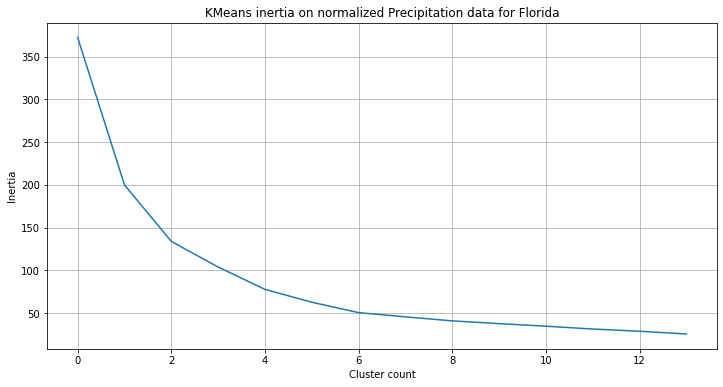

In [ ]:
inertia = []

for cluster_count in range(1, 15):
    
    kmeans = KMeans(cluster_count, init = 'k-means++', random_state = 42)
    kmeans.fit(normalize(prec_data[prec_data["STATE"] == "FL"].iloc[:, 7:-1]))
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(inertia, label = 'Precipitation Level')
plt.xlabel("Cluster count")
plt.ylabel("Inertia")
plt.title("KMeans inertia on normalized Precipitation data for Florida")
plt.grid(True)



No handles with labels found to put in legend.


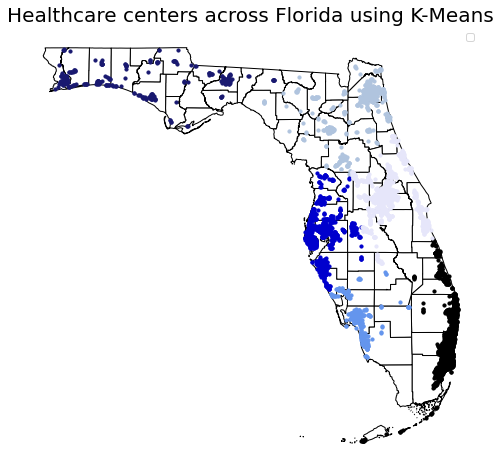

In [ ]:
map_data = prec_data[prec_data["STATE"] == "FL"].copy()

kmeans = KMeans(6, init = 'k-means++', random_state = 42)
kmeans.fit(normalize(map_data.iloc[:, 7:-1]))
map_data['Cluster'] = kmeans.labels_
map_data['Cluster'] = map_data['Cluster'].astype('category')

map_data.head()

ax = florida.plot(color = 'white', linewidth = 1, edgecolor = 'black', figsize = (12, 8))

centers_fl = map_data
points = [Point(xy) for xy in zip(centers_fl["LONGITUDE"], centers_fl["LATITUDE"])]
centers_fl = gpd.GeoDataFrame(centers_fl, crs = {'init': 'epsg:4326'}, geometry = points)

centers_fl[centers_fl["Cluster"] == 0].plot(color ='lightsteelblue' , ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 1].plot(color ='black' , ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 2].plot(color ='mediumblue' , ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 3].plot(color ='lavender' , ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 4].plot(color = 'midnightblue', ax = ax, markersize = 10)
centers_fl[centers_fl["Cluster"] == 5].plot(color = 'cornflowerblue', ax = ax, markersize = 10)


plt.title("Healthcare centers across Florida using K-Means", fontsize = 20)

ax.axis('off')
plt.legend()

In [ ]:
print(centers_fl[centers_fl['Cluster']==0].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==1].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==2].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==3].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==4].iloc[:,7:-3].mean(axis=1).mean())
print(centers_fl[centers_fl['Cluster']==5].iloc[:,7:-3].mean(axis=1).mean())

167.7741129808484
177.46881027938534
156.5945322793147
176.5604873183244
154.36013792409108
162.5939083669459


In [ ]:
centers_fl.groupby(["Cluster"]).mean().iloc[:, 3:-1].mean(axis = 1)

Cluster
0    156.630464
1    177.468810
2    167.774113
3    154.316021
4    176.560487
5    162.593908
dtype: float64

In [ ]:
cl_0 = list(centers_fl.index[centers_fl['Cluster']==0])
cl_1 = list(centers_fl.index[centers_fl['Cluster']==1])
cl_2 = list(centers_fl.index[centers_fl['Cluster']==2])
cl_3 = list(centers_fl.index[centers_fl['Cluster']==3])
cl_4 = list(centers_fl.index[centers_fl['Cluster']==4])
cl_5 = list(centers_fl.index[centers_fl['Cluster']==5])

centers_fl.loc[cl_0, 'Color']='midnightblue'
centers_fl.loc[cl_1, 'Color']='lavender'
centers_fl.loc[cl_2, 'Color']='black'
centers_fl.loc[cl_3, 'Color']='mediumblue'
centers_fl.loc[cl_4, 'Color']='lightsteelblue'
centers_fl.loc[cl_5, 'Color']='blue'

centers_ar.to_csv("centers_fl.csv", index = False)

In [ ]:
centers_fl.head()

,ID,NAME,ADDRESS,STATE,LATITUDE,LONGITUDE,TYPE,01_2010,02_2010,03_2010,04_2010,05_2010,06_2010,07_2010,08_2010,09_2010,10_2010,11_2010,12_2010,01_2011,02_2011,03_2011,04_2011,05_2011,06_2011,07_2011,08_2011,09_2011,10_2011,11_2011,12_2011,01_2012,02_2012,03_2012,04_2012,05_2012,06_2012,07_2012,08_2012,09_2012,...,01_2018,02_2018,03_2018,04_2018,05_2018,06_2018,07_2018,08_2018,09_2018,10_2018,11_2018,12_2018,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020,07_2020,08_2020,09_2020,10_2020,11_2020,12_2020,elevation,Cluster,geometry,Color
1,31233525,ADVENT HEALTH DADE CITY,13100 FORT KING RD,FL,28.347963,-82.200720,HOSPITAL,119,112,256,138,104,193,213,334,169,13,78,27,200,52,280,60,66,155,227,276,236,164,40,15,50,52,56,80,134,595,210,354,201,...,139,55,60,143,323,216,332,289,185,52,64,275,147,81,63,107,130,347,371,327,98,167,90,146,35,80,17,202,114,261,267,308,241,84,170,77,133,3,POINT (-82.20072 28.34796),mediumblue
2,7233484,DELRAY MEDICAL CENTER,5352 LINTON BLVD,FL,26.437193,-80.127788,HOSPITAL,50,149,217,232,122,226,213,261,316,65,47,42,79,10,74,74,105,202,199,371,243,398,26,33,18,107,71,214,319,366,228,530,293,...,78,16,18,170,534,306,239,203,196,73,52,49,172,108,70,69,172,347,205,375,70,199,84,228,37,109,9,113,547,275,396,250,375,431,295,39,133,2,POINT (-80.12779 26.43719),black
3,36034758,POINCIANA MEDICAL CENTER,325 CYPRESS PKWY,FL,28.144781,-81.476688,HOSPITAL,90,125,288,132,123,223,202,286,220,13,74,27,170,29,234,46,74,242,220,284,177,329,14,31,20,56,51,63,142,462,154,316,218,...,93,32,33,103,316,280,340,242,146,58,63,209,133,87,46,79,139,327,334,306,101,163,68,147,23,75,7,166,226,290,284,288,244,102,159,55,133,1,POINT (-81.47669 28.14478),lavender
4,36232068,ASSENCION ST. VINCENT'S MEDICAL CENTER CLAY CO...,1670 ST. VINCENT'S WAY,FL,30.108762,-81.832689,HOSPITAL,170,150,132,64,135,236,181,206,124,10,59,29,187,154,107,81,81,211,201,153,178,128,75,52,28,64,124,60,233,618,125,355,182,...,139,61,86,191,241,253,271,221,99,68,134,265,169,61,76,101,83,235,253,265,72,170,99,170,34,126,69,206,119,267,240,299,219,108,85,78,133,4,POINT (-81.83269 30.10876),lightsteelblue
5,36334471,ENCOMPASS HEALTH REHABILITATION HOSPITAL OF OCALA,2275 SW 22ND LANE,FL,29.165876,-82.162335,HOSPITAL,165,161,230,111,127,227,208,238,132,19,59,26,174,100,187,78,71,204,192,192,161,175,54,30,44,58,97,76,189,593,159,340,201,...,151,63,84,207,299,215,297,252,125,62,89,292,166,70,65,121,92,320,322,331,79,184,85,159,32,99,30,191,131,230,285,294,237,105,112,77,133,4,POINT (-82.16233 29.16588),lightsteelblue
